In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3338f1eb6e0659d3b585d14c3d0e696f


In [21]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3338f1eb6e0659d3b585d14c3d0e696f&q=Boston


In [22]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [24]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [25]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":52.09,"feels_like":47.59,"temp_min":48,"temp_max":55,"pressure":1017,"humidity":76},"visibility":10000,"wind":{"speed":5.82,"deg":230},"clouds":{"all":20},"dt":1602736384,"sys":{"type":1,"id":3486,"country":"US","sunrise":1602759446,"sunset":1602799321},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [26]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 52.09,
  'feels_like': 47.59,
  'temp_min': 48,
  'temp_max': 55,
  'pressure': 1017,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 230},
 'clouds': {'all': 20},
 'dt': 1602736384,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1602759446,
  'sunset': 1602799321},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [27]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [28]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 52.09,
  'feels_like': 47.59,
  'temp_min': 48,
  'temp_max': 55,
  'pressure': 1017,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 230},
 'clouds': {'all': 20},
 'dt': 1602736384,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1602759446,
  'sunset': 1602799321},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [30]:
# Get the JSON data.
boston_data = city_weather.json()

In [31]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 55 76 20 5.82


In [33]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-10-15 04:33:04'

In [34]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | ravar
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | deputatskiy
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | bubaque
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | phan thiet
Processing Record 13 of Set 1 | payo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | colares
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | mandalgovi
Processing Record 21 of Set 1 | fontem
Processing Record 22 of Set 1 | rafae

Processing Record 41 of Set 4 | ayagoz
Processing Record 42 of Set 4 | keti bandar
Processing Record 43 of Set 4 | saint anthony
Processing Record 44 of Set 4 | necochea
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | ponta delgada
Processing Record 47 of Set 4 | santa isabel do rio negro
Processing Record 48 of Set 4 | hay river
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | la orilla
Processing Record 1 of Set 5 | lagdo
Processing Record 2 of Set 5 | bensonville
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | kailua
Processing Record 5 of Set 5 | erdenet
Processing Record 6 of Set 5 | nantucket
Processing Record 7 of Set 5 | kayerkan
Processing Record 8 of Set 5 | acarau
Processing Record 9 of Set 5 | khilchipur
Processing Record 10 of Set 5 | quatre cocos
Processing Record 11 of Set 5 | port-cartier
Processing Record 12 of Set 5 | kozyatyn
Processing Record 13 of Set 5 | charlestown
Processing Record 14 of Set 5 | 

Processing Record 33 of Set 8 | bay roberts
Processing Record 34 of Set 8 | gao
Processing Record 35 of Set 8 | sabha
Processing Record 36 of Set 8 | dakar
Processing Record 37 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 38 of Set 8 | paita
Processing Record 39 of Set 8 | korla
Processing Record 40 of Set 8 | provideniya
Processing Record 41 of Set 8 | farafangana
Processing Record 42 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 43 of Set 8 | amderma
City not found. Skipping...
Processing Record 44 of Set 8 | san juan
Processing Record 45 of Set 8 | banjar
Processing Record 46 of Set 8 | assiniboia
Processing Record 47 of Set 8 | nurota
Processing Record 48 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 8 | channagiri
Processing Record 50 of Set 8 | half moon bay
Processing Record 1 of Set 9 | takapau
Processing Record 2 of Set 9 | mantua
Processing Record 3 of Set 9 | buraydah
Processing Record 4 of Set 9 | alofi
Process

Processing Record 15 of Set 12 | minbu
Processing Record 16 of Set 12 | chipinge
Processing Record 17 of Set 12 | kieta
Processing Record 18 of Set 12 | bosaso
Processing Record 19 of Set 12 | faya
Processing Record 20 of Set 12 | novyy urengoy
Processing Record 21 of Set 12 | kalmar
Processing Record 22 of Set 12 | shimoda
Processing Record 23 of Set 12 | andra
Processing Record 24 of Set 12 | goderich
Processing Record 25 of Set 12 | moron
Processing Record 26 of Set 12 | dali
Processing Record 27 of Set 12 | evensk
Processing Record 28 of Set 12 | yaransk
Processing Record 29 of Set 12 | montego bay
Processing Record 30 of Set 12 | anadyr
Processing Record 31 of Set 12 | zabaykalsk
Processing Record 32 of Set 12 | berestechko
Processing Record 33 of Set 12 | inyonga
Processing Record 34 of Set 12 | hambantota
Processing Record 35 of Set 12 | marawi
Processing Record 36 of Set 12 | amapa
Processing Record 37 of Set 12 | shkotovo-22
City not found. Skipping...
Processing Record 38 of 

In [35]:
len(city_data)

550

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,77.00,69,75,10.29,TO,2020-10-15 04:40:35
1,Ravar,31.27,56.81,66.97,18,0,3.42,IR,2020-10-15 04:40:35
2,Punta Arenas,-53.15,-70.92,44.60,65,40,21.92,CL,2020-10-15 04:40:35
3,Albany,42.60,-73.97,48.99,64,72,3.36,US,2020-10-15 04:40:04
4,Hermanus,-34.42,19.23,57.00,95,2,5.10,ZA,2020-10-15 04:40:36
5,Kapaa,22.08,-159.32,78.80,83,90,5.82,US,2020-10-15 04:36:11
6,Deputatskiy,69.30,139.90,15.93,98,99,0.81,RU,2020-10-15 04:40:37
7,Avarua,-21.21,-159.78,71.60,56,63,3.36,CK,2020-10-15 04:40:37
8,Bubaque,11.28,-15.83,82.17,76,99,9.08,GW,2020-10-15 04:40:37
9,Phan Thiet,10.93,108.10,82.22,83,100,10.33,VN,2020-10-15 04:40:38


In [37]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-10-15 04:40:35,-21.20,-175.20,77.00,69,75,10.29
1,Ravar,IR,2020-10-15 04:40:35,31.27,56.81,66.97,18,0,3.42
2,Punta Arenas,CL,2020-10-15 04:40:35,-53.15,-70.92,44.60,65,40,21.92
3,Albany,US,2020-10-15 04:40:04,42.60,-73.97,48.99,64,72,3.36
4,Hermanus,ZA,2020-10-15 04:40:36,-34.42,19.23,57.00,95,2,5.10
...,...,...,...,...,...,...,...,...,...
545,Faanui,PF,2020-10-15 04:43:35,-16.48,-151.75,79.12,76,43,11.41
546,Atasu,KZ,2020-10-15 04:41:08,48.68,71.64,55.80,40,0,7.27
547,Kissamos,GR,2020-10-15 04:43:36,35.49,23.66,66.00,88,20,6.29
548,Edmundston,CA,2020-10-15 04:43:31,47.37,-68.33,44.01,100,40,5.82


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1602737115.50932

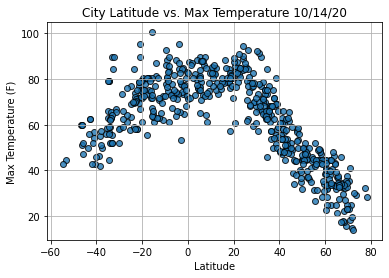

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

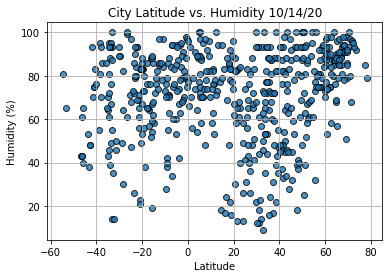

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

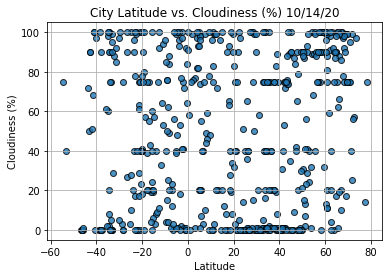

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

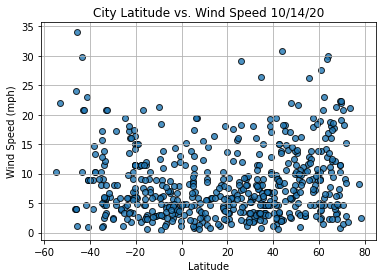

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [64]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-10-15 04:40:35,-21.20,-175.20,77.00,69,75,10.29
2,Punta Arenas,CL,2020-10-15 04:40:35,-53.15,-70.92,44.60,65,40,21.92
4,Hermanus,ZA,2020-10-15 04:40:36,-34.42,19.23,57.00,95,2,5.10
7,Avarua,CK,2020-10-15 04:40:37,-21.21,-159.78,71.60,56,63,3.36
10,Payo,ID,2020-10-15 04:40:38,-3.75,103.64,95.13,42,93,2.51
...,...,...,...,...,...,...,...,...,...
521,Kieta,PG,2020-10-15 04:43:29,-6.22,155.63,81.79,76,56,2.46
529,Moron,AR,2020-10-15 04:43:31,-34.65,-58.62,55.99,81,90,12.75
537,Inyonga,TZ,2020-10-15 04:43:34,-6.72,32.07,71.62,60,3,7.65
544,Valparaiso,CL,2020-10-15 04:39:37,-33.04,-71.63,51.80,100,90,4.70


In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-66-f235f13efcbc>, line 6)

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-67-8677a9d312d4>, line 6)

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

SyntaxError: EOL while scanning string literal (<ipython-input-68-1d3c2bd0b2d6>, line 6)

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-56-9c3e8b244753>, line 6)

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(40,10))

SyntaxError: EOL while scanning string literal (<ipython-input-57-87456646111d>, line 6)

In [59]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-59-0d35f888e1d7>, line 6)

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-60-7024af74f12d>, line 6)

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (40,35))

NameError: name 'linregress' is not defined